In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('measures_v2.csv')

In [3]:
d=df.profile_id.unique()
print(sorted(d))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81]


In [4]:
df81 = df[df.profile_id==81]
df81

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
759312,-1.940790,24.743631,23.685831,1.109735,22.200928,0.208017,-2.002040,1.103881,24.243708,22.542758,23.520256,4.971873e-03,81
759313,0.061267,24.721631,23.677514,1.011419,22.213042,26.391552,-2.001441,0.058642,24.252124,22.518376,23.518006,-7.373598e-01,81
759314,4.869035,24.700827,23.677562,0.839013,22.216350,114.959876,-1.996960,-0.699983,24.246271,22.513729,23.519906,-1.275860e+00,81
759315,11.403643,24.685476,23.681716,0.836843,22.205915,249.357019,-2.075419,-2.092800,24.248455,22.495824,23.529679,-2.269425e+00,81
759316,19.176261,24.671343,23.681405,1.511877,22.196047,416.540609,-2.412571,-4.697710,24.255223,22.494463,23.524978,-4.132695e+00,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776979,-0.662298,85.633569,81.572526,-0.673085,79.454299,-0.001426,-2.000589,1.095233,58.622086,80.292928,24.904142,-3.705492e-320,81
776980,-0.639878,85.625558,81.556430,-0.790497,79.456187,0.001091,-2.000754,1.097885,58.626926,80.322906,24.904809,-3.705492e-320,81
776981,-0.647135,85.614983,81.541998,-0.678542,79.454690,0.000334,-2.000000,1.097186,58.631781,80.334215,24.905987,-3.705492e-320,81
776982,-0.627400,85.616027,81.518069,-0.812512,79.453742,0.004046,-2.001122,1.096962,58.634744,80.324450,24.902054,-3.705492e-320,81


### Линейная регрессия

In [5]:
X = df[['u_q']]
y = df['motor_speed']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [7]:
cols = X_train.columns 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

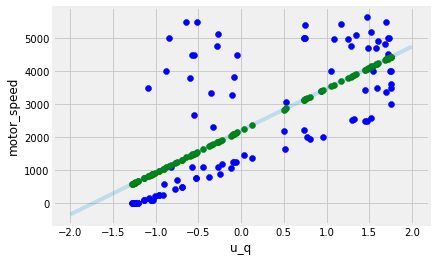

In [18]:
plt.scatter(X_test[:100], y_test[:100],color='blue')
plt.scatter(X_test[:100], y_test_predicted[:100],color='green')

def f_line(x):
    return  lr.coef_*x + lr.intercept_

x_line = np.linspace(-2, 2, 9)
y_line = f_line(x_line)
plt.plot(x_line, y_line, alpha = 0.2)

plt.xlabel('u_q')
plt.ylabel('motor_speed')

plt.show()